# Research hackathon year 1 - Numerical ML classifiers and Explainable AI

Data: http://emscad.samos.aegean.gr/

Aim: Build and test ML features with numerical features

### Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [32]:
selected_data = pd.read_csv("selected_data2.csv")
selected_data

,description,has_short_company_profile,company_profile,requirements,benefits,has_company_logo,low_required_education,has_questions,telecommuting,has_short_requirements,fraudulent
0,33,1,1,1,1,0,0,0,0,1,1
1,8,1,1,8,8,0,0,0,0,1,1
2,53,1,1,45,1,0,1,0,0,0,1
3,187,1,1,1,1,0,0,0,0,1,1
4,9211,1,1,9184,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
895,83,1,1,1,1,0,0,0,0,1,1
896,87,1,1,188,87,0,0,1,0,0,1
897,54,1,1,218,38,0,0,0,0,0,1
898,89,1,1,51,40,0,0,0,0,0,1


In [33]:
X = selected_data.iloc[:,0:10] 
y = selected_data.iloc[:,10]  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state= 26) 

## Simple Logistic Regressor (baseline model)

Accuracy: 0.897 (sd: 0.049)

Accuracy (overall correct predictions): 0.88
Auc: 0.92
Recall (all 1s predicted right): 0.92
Precision (confidence when predicting a 1): 0.86
Detail:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       128
           1       0.86      0.92      0.89       142

    accuracy                           0.88       270
   macro avg       0.88      0.88      0.88       270
weighted avg       0.88      0.88      0.88       270



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


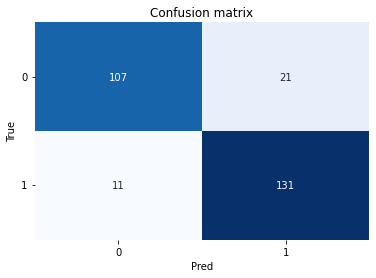

In [69]:
from sklearn.linear_model import LogisticRegression

# create model
model = LogisticRegression()

model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)[:,1]

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

## Decision Tree

Accuracy (overall correct predictions): 0.87
Auc: 0.86
Recall (all 1s predicted right): 0.88
Precision (confidence when predicting a 1): 0.87
Detail:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       128
           1       0.87      0.88      0.88       142

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270



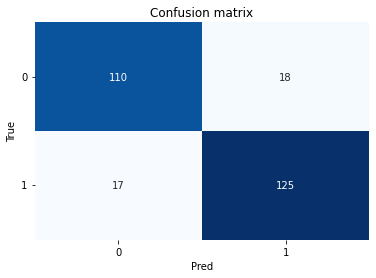

In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7, random_state=42)

model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)[:,1]

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

## Random forest

In [38]:
## call model
rf = RandomForestClassifier(n_estimators = 30, random_state = 42)
# fit model
rf.fit(X_train, y_train)

predicted_prob = rf.predict_proba(X_test)[:,1]
rf_predicted = rf.predict(X_test)

## Accuray and AUC
accuracy = metrics.accuracy_score(y_test, rf_predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision and Recall
recall = metrics.recall_score(y_test, rf_predicted)
precision = metrics.precision_score(y_test, rf_predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, rf_predicted, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.88
Auc: 0.96
Recall (all 1s predicted right): 0.92
Precision (confidence when predicting a 1): 0.86
Detail:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       128
           1       0.86      0.92      0.89       142

    accuracy                           0.88       270
   macro avg       0.88      0.88      0.88       270
weighted avg       0.88      0.88      0.88       270



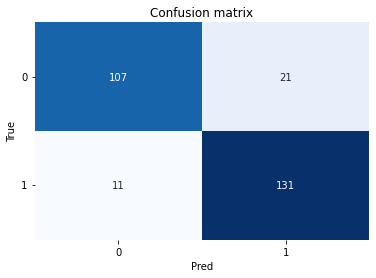

In [39]:
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, rf_predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

## Gradient boosting

In [65]:
## call model
GB = ensemble.GradientBoostingClassifier(max_depth=7, random_state=42)
GB.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, random_state=42)

Accuracy (overall correct predictions): 0.88
Auc: 0.94
Recall (all 1s predicted right): 0.91
Precision (confidence when predicting a 1): 0.87
Detail:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       128
           1       0.87      0.91      0.89       142

    accuracy                           0.88       270
   macro avg       0.88      0.88      0.88       270
weighted avg       0.88      0.88      0.88       270



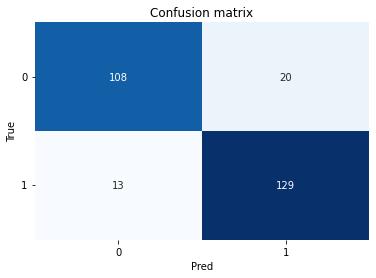

In [66]:
## test
predicted = GB.predict(X_test)
predicted_prob = GB.predict_proba(X_test)[:,1]

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# Explainable AI

In [67]:
import shap

In [70]:
# Fits the explainer
explainer = shap.Explainer(GB.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 271it [00:13,  6.30it/s]                                       


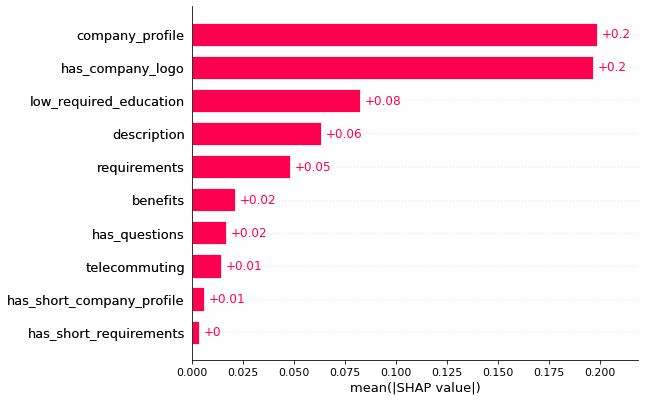

In [71]:
shap.plots.bar(shap_values)


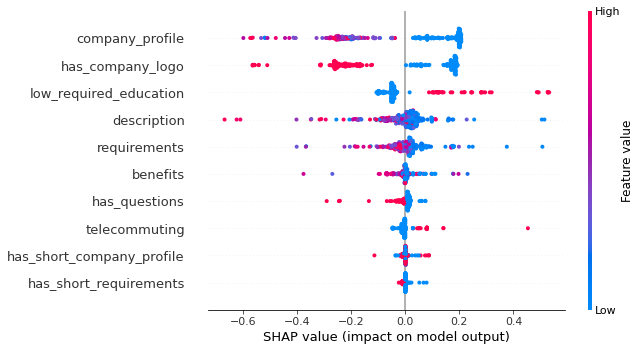

In [72]:
shap.plots.beeswarm(shap_values)